### Import Required Modules

In [237]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

### Load CSV file into Dataframe

In [238]:
df = pd.read_csv('Social_Network_Ads.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### Preprocess the dataset
1. Drop irrelevant field
2. Convert string type to numeric

In [239]:
# Drop the ID field, it is not relevant
df = df.drop(columns=['User ID'])
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


2. Change gender type from 'Male'/'Female' to 0 and 1

In [240]:
df['Gender'] = df['Gender'].astype('category').cat.codes

### Check to see how related these features are to one another

<Axes: >

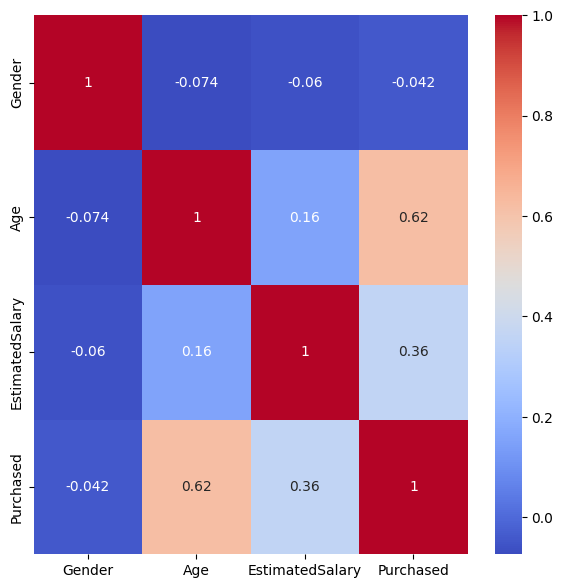

In [241]:
corr_matrix = df.corr(method='pearson')
plt.figure(figsize=(7,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

### Make Purchased the Target

In [242]:
X = df.drop(columns=['Purchased'])
y = df['Purchased']

### Split the dataset: 25% for testing and 75% for training.

In [243]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=42)

### Build a Logistic Model

In [244]:
logit_model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000)
logit_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### Predict with Logistic Model and test dataset

In [245]:
y_pred = logit_model.predict(X_test)

### Check model efficiency

Logistic Performance:
Accuracy = 0.88

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91        63
           1       0.93      0.73      0.82        37

    accuracy                           0.88       100
   macro avg       0.90      0.85      0.86       100
weighted avg       0.89      0.88      0.88       100



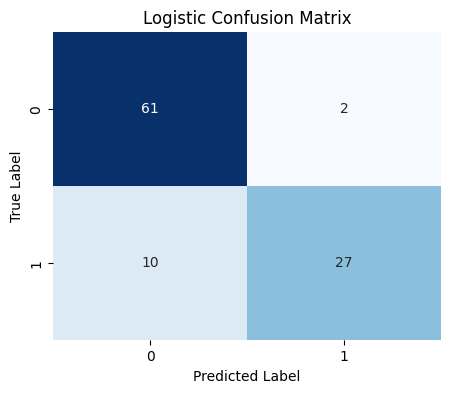

In [246]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Performance:")
print('Accuracy =', accuracy)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

## Build SVM model on same dataset

### Build an SVM model, scale before you build through a pipeline

In [247]:
# Create a full preprocessing + SVM pipeline
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),                   # scales features
    ('svm', SVC(kernel='rbf', C=10.0, gamma='scale', random_state=42))
])

svm_pipeline


,steps,"[('scaler', ...), ('svm', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,10.0
,kernel,'rbf'
,degree,3
,gamma,'scale'


### Use the model to train

In [248]:
# Fit model
svm_pipeline.fit(X_train, y_train)



,steps,"[('scaler', ...), ('svm', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,10.0
,kernel,'rbf'
,degree,3
,gamma,'scale'


### Predict using built model on test dataset

In [249]:
# Predict
y_pred_svm = svm_pipeline.predict(X_test)


### Check model performance

In [250]:
print("SVM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


SVM Performance:
Accuracy: 0.94

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        63
           1       0.88      0.97      0.92        37

    accuracy                           0.94       100
   macro avg       0.93      0.95      0.94       100
weighted avg       0.94      0.94      0.94       100



Text(33.22222222222222, 0.5, 'True Label')

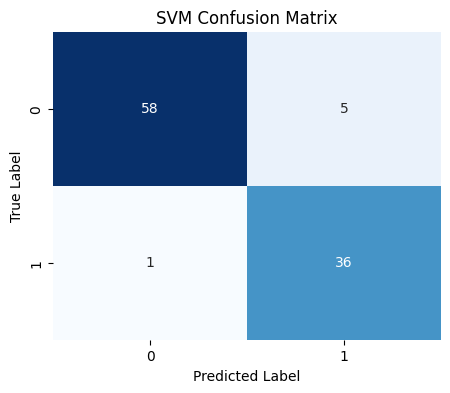

In [251]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')


### Compare the results
Accuracy of 88% with Logistic model and 94% achieved with SVM model. 

As regards precision, SVM recorded 88% on those who purchased advert as against 93% record by Logistic Model.
However, its excellent performance of 98% on those who did not purchase advert makes the model most suitable.